# The double pendulum

This project's aim is to simulate numerically, via python, the chaotic movement of an idealized double pendulum system in two dimensions. We will then try to understand by analysing errors and the behaviour of the solution why this system is called "chaotic" and how chaotic it is exactly.

## Mathematical model

**Lagrangian method**

The two Euler-Lagrange equations describing our double pendulum system are:


Some changes in variables can be done here, to give the following expressions:

## Numerical scheme

We have two ordinary differential equations, both of the second order, that we will analyze numerically via the **finite differences method**.

In this particular case, we will choose the ***Runge-Kutta 4*** scheme.

Normally, we would want to use a symplectic scheme that is able to conserve the value of the total energy of the system. But the error created by a non-syplectic scheme is not significant enough for small timescales used to study a typical double pendulum. 
RK4 

In [1]:
# INITIALIZATION of the project and the parameters

def Initialize(planet):
    print("")
    print(" ___ DOUBLE PENDULUM SIMULATION ___ ")
    print("")
    print(" --- Initialization of the model ----")
    print("")
    g = planet()
    print("")
    l1 = float(input(" - Length l1 of the upper rod (m): ... "))
    print("")
    l2 = float(input(" - Length l2 of the lower rod (m): ... "))
    print("")
    m1 = float(input(" - Mass m1 of the upper rod (kg): ... "))
    print("")
    m2 = float(input(" - Mass m2 of the lower rod (kg): ... "))
    print("")
    theta1 = float(input(" - Initial angle theta_1 of the upper rod (degrees): ... "))
    print("")
    theta2 = float(input(" - Initial angle theta_2 of the lower rod (degrees): ... "))
    print("")
    omega1 = float(input(" - Initial angular velocity omega_1 of the upper rod (m/s): ... "))
    print("")
    omega2 = float(input(" - Initial angular velocity omega_2 of the lower rod (m/s): ... "))
    print("")
    return g, l1, l2, m1, m2, theta1, theta2, omega1, omega2

def planet():
    """ Sets the planet (and thus the gravitational acceleration g) where the pendulum is located """
    
    planet_list = ["mercury", "venus", "earth", "mars", "jupiter", "saturn", "uranus", "neptune", "pluto", "sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto", "Sun"]
    
    planet = input("\n  ~ Choose the planet : \n - Mercury \n - Venus \n - Earth \n - Mars \n - Jupiter \n - Saturn \n - Uranus \n - Neptune \n - Pluto \n - Sun \n -> ... ")
    while planet not in planet_list:
        print("\n  ~ The planet you entered is not in the list. Please enter a valid planet.")
        planet = input("\n  ~ Choose the planet : \n - Mercury \n - Venus \n - Earth \n - Mars \n - Jupiter \n - Saturn \n - Uranus \n - Neptune \n - Pluto \n - Sun \n -> ... ")
    
    planet_g = {"Mercury" : 3.70,
                "Venus" : 8.87,
                "Earth" : 9.81,
                "Mars" : 3.71,
                "Jupiter" : 24.79,
                "Saturn" : 10.44,
                "Uranus" : 8.87,
                "Neptune" : 11.15,
                "Pluto" : 0.62,
                "Sun" : 274}

    if planet == "mercury" or planet == "Mercury":
        g = planet_g["Mercury"]
    elif planet == "venus" or planet == "Venus":
        g = planet_g["Venus"]
    elif planet == "earth" or planet == "Earth":
        g = planet_g["Earth"]
    elif planet == "mars" or planet == "Mars":
        g = planet_g["Mars"]
    elif planet == "jupiter" or planet == "Jupiter":
        g = planet_g["Jupiter"]
    elif planet == "saturn" or planet == "Saturn":
        g = planet_g["Saturn"]
    elif planet == "uranus" or planet == "Uranus":
        g = planet_g["Uranus"]
    elif planet == "neptune" or planet == "Neptune":
        g = planet_g["Neptune"]
    elif planet == "pluto" or planet == "Pluto":
        g = planet_g["Pluto"]
    elif planet == "sun" or planet == "Sun":
        g = planet_g["Sun"]
    else:
        print("Error")
        g = 0
    return g

# Call the initialization function to fix the parameters
g, l1, l2, m1, m2, th1_0, th2_0, w1_0, w2_0 = Initialize(planet)


 ___ DOUBLE PENDULUM SIMULATION ___ 

 --- Initialization of the model ----












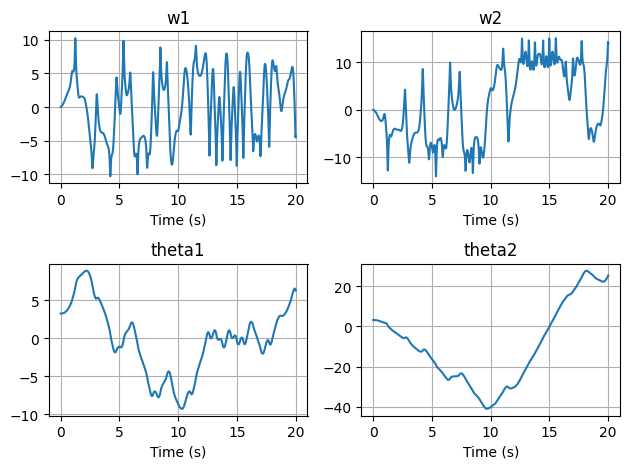

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
t_max = 20
h = 0.02 # Timestep size matters !!

# Initial conditions
th1_0 = np.pi + 0.1
th2_0 = np.pi

u0 = np.array([w1_0, w2_0, th1_0, th2_0])

def big_F(w1, w2, th1, th2):
    """ Derivatives of the u array """
    
    # Separating the numerator and the denominator of the equations for clarity
    num1 = -1*m2*(l1*w1**2*np.sin(th1-th2)-g*np.sin(th1-th2))*np.cos(th1-th2)-m2*l2*w2**2*np.sin(th1-th2)-(m1+m2)*g*np.sin(th1)
    denom1 = ((m1+m2)*l1-l1*np.cos(th1-th2)**2*m2)
    
    num2 = -1*(m1+m2)*(l1*w1**2*np.sin(th1-th2)-g*np.sin(th2))/np.cos(th1-th2)-m2*l2*w2**2*np.sin(th1-th2)-(m1+m2)*g*np.sin(th1)
    denom2 = -1*l2*(m1+m2)/np.cos(th1-th2)+m2*l2*np.cos(th1-th2)
    
    w1_dot = num1/denom1
    w2_dot = num2/denom2
    
    return np.array([w1_dot, w2_dot, w1, w2])

def F_MIT(w1, w2, th1, th2): # MIT version of the derivative
    num1 = -g*(2*m1+m2)*np.sin(th1)-m2*g*np.sin(th1-2*th2)-2*np.sin(th1-th2)*m2*(w2**2*l2+w1**2*l1*np.cos(th1-th2))
    denom1 = l1*(2*m1+m2-m2*np.cos(2*th1-2*th2))
    
    num2 = 2*np.sin(th1-th2)*(w1**2*l1*(m1+m2)+g*(m1+m2)*np.cos(th1)+w2**2*l2*m2*np.cos(th1-th2))
    denom2 = l2*(2*m1+m2-m2*np.cos(2*th1-2*th2))
    
    w1_dot = num1/denom1
    w2_dot = num2/denom2    
    
    return np.array([w1_dot, w2_dot, w1, w2])
    
    
def solve_RK4(f, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    u = np.zeros((N,4))
    u[0] = u0
    for i in range(N - 1):
        k1 = h * f(u[i][0], u[i][1], u[i][2], u[i][3])
        k2 = h * f(u[i][0] + k1[0]/2, u[i][1] + k1[1]/2, u[i][2] + k1[2]/2, u[i][3] + k1[3]/2)
        k3 = h * f(u[i][0] + k2[0]/2, u[i][1] + k2[1]/2, u[i][2] + k2[2]/2, u[i][3] + k2[3]/2)
        k4 = h * f(u[i][0] + k3[0], u[i][1] + k3[1], u[i][2] + k3[2], u[i][3] + k3[3])
        u[i+1] = u[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, u

#t, u = solve_RK4(big_F, u0, h, t_max)

t1, u1 = solve_RK4(F_MIT, u0, h, t_max)

th1 = u1[:,2] 
th2 = u1[:,3]
w1 = u1[:,0]
w2 = u1[:,1]

# Plot the results
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(t1, w1)
ax[0, 0].set_xlabel("Time (s)")
ax[0, 0].set_title("w1")
ax[0, 0].grid()
    
ax[0, 1].plot(t1, w2)
ax[0, 1].set_xlabel("Time (s)")
ax[0, 1].set_title("w2")
ax[0, 1].grid()
    
ax[1, 0].plot(t1, th1)
ax[1, 0].set_xlabel("Time (s)")
ax[1, 0].set_title("theta1")
ax[1, 0].grid()
    
ax[1, 1].plot(t1, th2)
ax[1, 1].set_xlabel("Time (s)")
ax[1, 1].set_title("theta2")
ax[1, 1].grid()

plt.tight_layout()
# plt.savefig("angles_and_velocities.png")

plt.show()



## Visualization of the system

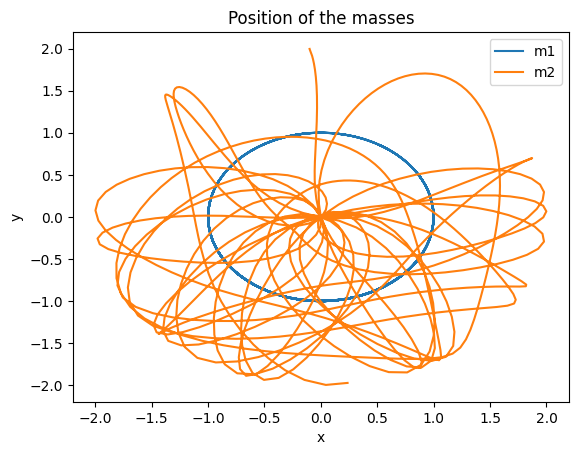

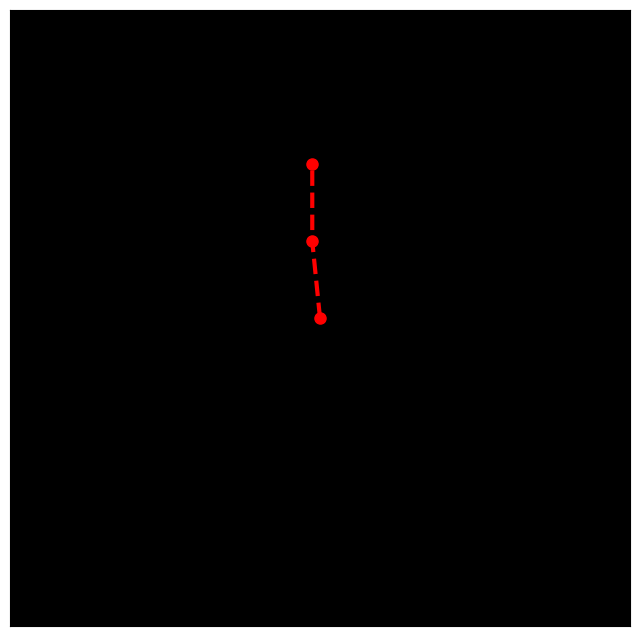

In [5]:
import matplotlib.animation as animation

N = int(np.floor(t_max / h)) + 1 
# Defined here as a global variable but also defined in the function solve_RK4. -> redundant

### Position in cartesian coordinates

x1 = np.zeros(N) # x component of m1
y1 = np.zeros(N) # y component of m1

x2 = np.zeros(N) # x component of m2
y2 = np.zeros(N) # y component of m2

for i in range(N):
    x1[i] = l1*np.sin(th1[i])
    y1[i] = -l1*np.cos(th1[i])
    
    x2[i] = x1[i] + l2*np.sin(th2[i])
    y2[i] = y1[i] - l2*np.cos(th2[i])

plt.figure()
plt.plot(x1, y1, label="m1")
plt.plot(x2, y2, label="m2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Position of the masses")
plt.legend()
#plt.savefig("XY_position.png")

plt.show()

def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(4*(l1+l2),4*(l1+l2)))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-2*(l1+l2),2*(l1+l2))
ax.set_xlim(-2*(l1+l2),2*(l1+l2))
ani = animation.FuncAnimation(fig, animate, frames=len(t1), interval=50)
ani.save('pen.gif',writer='pillow',fps=1/h)

## Energy of the system

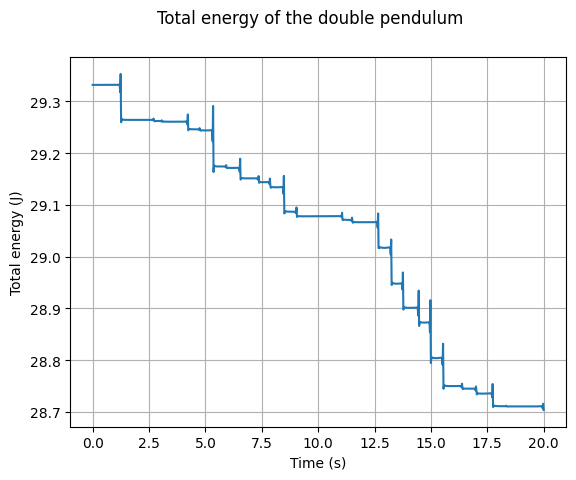

In [ ]:
### Energy calculation

T = np.zeros(N)
V = np.zeros(N)
E = np.zeros(N)

for i in range(N):
    T[i] = 0.5*m1*l1**2*w1[i]**2 + 0.5*m2*(l1**2*w1[i]**2 + l2**2*w2[i]**2 + 2*l1*l2*w1[i]*w2[i]*np.cos(th1[i]-th2[i])) # kinetic energy
    V[i] = -(m1 + m2)*g*l1*np.cos(th1[i]) - m2*g*l2*np.cos(th2[i]) # potential energy
    E[i] = T[i] + V[i] # total energy


plt.figure()
plt.plot(t1, E) # total energy vs time
plt.suptitle("Total energy of the double pendulum")
plt.xlabel("Time (s)")
plt.ylabel("Total energy (J)")
plt.grid()
#plt.savefig("total_energy.png")

plt.show()

## Spin-up

## Chaos and Lyapunov exponents

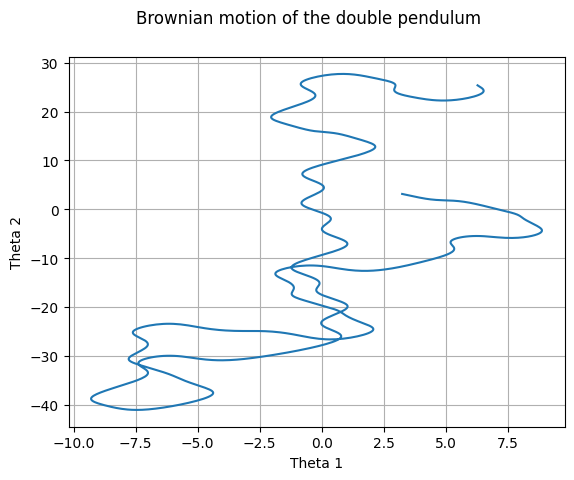

In [7]:
plt.figure()
plt.plot(th1, th2)  # brownian motion (theta1 vs theta2)
plt.suptitle("Brownian motion of the double pendulum")
plt.xlabel("Theta 1")
plt.ylabel("Theta 2")
plt.grid()
# plt.savefig("brownian_motion.png")

plt.show()